<h1>DATA ANALYTICS FOR ACCIDENT DATA</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

<h1>GET THE DATA FRAME</h1>

<h1>INSIGHT NUMBER 1</h1>

In [2]:
accident = pd.read_csv('datasets//accident_data.csv')
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>INSIGHT NUMBER 2</h1>

<h2>GET ACCIDENT INFO AND DESCRIBE</h2>

In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h2>GET THE DATA FROM EACH COLUMN</h2>

In [6]:
accident['Accident_Severity']

0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: object

<h2>GET THE NULL VALUE</h2>

In [7]:
accident.isnull()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660675,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660676,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660677,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>INSIGHT NUMBER 3</h1>

<h2>FILLING UP THE NULL VALUE</h2>

In [9]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface conditions')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted weather conditions')

In [10]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>CONVERT DATA TYPE TO_DATETIME DATA TYPE</h2>

In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [12]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

AttributeError: Can only use .str accessor with string values!

<h1>INSIGHT NUMBER 4</h1>

<h1>EXTRACTING DATE INFORMATION USING PANDAS DATE TIME</h1>

In [13]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [14]:
accident['Year']

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
660674    2022
660675    2022
660676    2022
660677    2022
660678    2022
Name: Year, Length: 660679, dtype: int32

<h1>INSIGHT NUMBER 5</h1>

<h3>MAKING YEAR VARIABLES</h3>

<h3>YEAR 2019</h3>

In [15]:
year_2019 = accident[accident['Year'] == 2019]
year_2019

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted weather conditions,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted weather conditions,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,20,4
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,21,5
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019,12,23,0
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,12,23,0


In [16]:
year_2020 = accident[accident['Year'] == 2020]
year_2020

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
182115,200801BS69439,Serious,2020-01-23,51.506812,Darkness - lights lit,Kensington and Chelsea,-0.214677,1,1,Dry,unaccounted,Urban,Fine no high winds,Car,2020,1,23,3
182116,200801BS69594,Serious,2020-02-15,51.496323,Daylight,Kensington and Chelsea,-0.170138,1,1,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2020,2,15,5
182117,200801BS69698,Serious,2020-02-27,51.502042,Darkness - lights lit,Kensington and Chelsea,-0.190946,1,1,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2020,2,27,3
182118,200801BS69935,Serious,2020-02-25,51.492733,Daylight,Kensington and Chelsea,-0.193763,1,1,Dry,Roundabout,Urban,Fine no high winds,Car,2020,2,25,1
182119,200801BS69938,Serious,2020-02-27,51.493271,Darkness - lights lit,Kensington and Chelsea,-0.199504,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020,2,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352701,2.01E+12,Slight,2020-11-24,55.233969,Darkness - no lighting,Dumfries and Galloway,-3.394276,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Minibus (8 - 16 passenger seats),2020,11,24,1
352702,2.01E+12,Slight,2020-12-06,54.983911,Daylight,Dumfries and Galloway,-3.195094,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020,12,6,6
352703,2.01E+12,Slight,2020-12-17,55.008072,Darkness - no lighting,Dumfries and Galloway,-3.334825,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2020,12,17,3
352704,2.01E+12,Slight,2020-12-16,54.986388,Daylight,Dumfries and Galloway,-3.180789,1,1,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2020,12,16,2


In [17]:
year_2021 = accident[accident['Year'] == 2021]
year_2021

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021,1,1,4
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,5,1
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,4,0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021,1,5,1
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516255,2.01E+12,Serious,2021-12-15,55.072192,Darkness - no lighting,Dumfries and Galloway,-3.297647,1,5,Dry,Dual carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2021,12,15,2
516256,2.01E+12,Serious,2021-12-20,55.008460,Darkness - lights lit,Dumfries and Galloway,-3.088242,1,1,Frost or ice,Slip road,Rural,Fine no high winds,Car,2021,12,20,0
516257,2.01E+12,Slight,2021-12-23,54.995302,Daylight,Dumfries and Galloway,-3.259680,1,1,Frost or ice,Single carriageway,Rural,Snowing + high winds,Motorcycle over 125cc and up to 500cc,2021,12,23,3
516258,2.01E+12,Slight,2021-12-21,55.120172,Darkness - lights lit,Dumfries and Galloway,-3.356438,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021,12,21,1


In [18]:
year_2022 = accident[accident['Year'] == 2022]
year_2022

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
516260,201001BS70003,Slight,2022-01-11,51.484087,Daylight,Kensington and Chelsea,-0.164002,1,2,Wet or damp,Single carriageway,Urban,Other,Car,2022,1,11,1
516261,201001BS70004,Slight,2022-01-11,51.509212,Darkness - lights lit,Kensington and Chelsea,-0.195273,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022,1,11,1
516262,201001BS70006,Slight,2022-01-12,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022,1,12,2
516263,201001BS70007,Slight,2022-01-02,51.513314,Darkness - lights lit,Kensington and Chelsea,-0.198858,1,2,Dry,Roundabout,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022,1,2,6
516264,201001BS70008,Slight,2022-01-04,51.484361,Darkness - lights lit,Kensington and Chelsea,-0.175802,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2022,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h1>INSIGHT NUMBER 6</h1>

<h2>get light conditions each year</h2>

In [19]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [20]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [21]:
year_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h4>73% OF THE ACCIDENT IN 2019 HAPPENED IN DAYLIGHT</h4>

In [22]:
year_2020['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       124552
Darkness - lights lit           33473
Darkness - no lighting          10067
Darkness - lighting unknown      1792
Darkness - lights unlit           707
Name: count, dtype: int64

In [23]:
year_2021['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       119518
Darkness - lights lit           32549
Darkness - no lighting           9226
Darkness - lighting unknown      1607
Darkness - lights unlit           654
Name: count, dtype: int64

In [24]:
year_2022['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       107768
Darkness - lights lit           27544
Darkness - no lighting           7302
Darkness - lighting unknown      1317
Darkness - lights unlit           488
Name: count, dtype: int64

<h1>INSIGHT NUMBER 7</h1>

<h2>ACCIDENT SEVERITY OF EACH YEAR</h2>

In [25]:
year_2019['Accident_Severity'].count()

182115

In [26]:
year_2019['Accident_Severity'].value_counts()

Accident_Severity
Slight     155079
Serious     24322
Fatal        2714
Name: count, dtype: int64

<h4>THE TOTAL NUMBER OF CASUALTIES IN 2019 IS 182,115. 85.2% OF IT IS JUST A SLIGHT CASUALTY, 13.4% IS SERIOUS CASUALTIES AND 1.5% ARE THE FATAL ONES</h4>

In [27]:
year_2020['Accident_Severity'].count()

170591

In [28]:
year_2020['Accident_Severity'].value_counts()

Accident_Severity
Slight     145129
Serious     23121
Fatal        2341
Name: count, dtype: int64

<h4>THE TOTAL NUMBER OF ACCIDENT SEVERITY IN 2020 IS 170,591. 85.1% OF IT IS JUST A SLIGHT CASUALTY, 13.6% OF IT IS SERIOUS INJURIES AND 1.4% IS FATALITY</h4>

In [29]:
year_2021['Accident_Severity'].value_counts()

Accident_Severity
Slight     139500
Serious     21997
Fatal        2057
Name: count, dtype: int64

In [35]:
year_2022['Accident_Severity'].value_counts()

Accident_Severity
Slight     124093
Serious     18777
Fatal        1549
Name: count, dtype: int64

<h1>INSIGHT NUMBER 8</h1>

<h3>NUMBER OF CASUALTIES AND NUMBER OF VEHICLES</h3>

In [36]:
y19_casualties_vehicle.sum()

124809

In [37]:
y19_casualties_vehicle = year_2019['Number_of_Casualties'] & year_2019['Number_of_Vehicles']
y19_casualties_vehicle.value_counts()

0     91742
1     58668
2     29629
3      1545
4       455
5        55
6        14
8         4
7         1
14        1
16        1
Name: count, dtype: int64

<h4>IN TOTAL OF 124,809 VEHICLES THERE ARE 42.2% CASUALTIES THAT EVERY SINGLE VEHICLE CAUSED in 2019</h4>

In [38]:
y20_casualties_vehicle.sum()

116517

In [39]:
y20_casualties_vehicle = year_2020['Number_of_Casualties'] & year_2020['Number_of_Vehicles']
y20_casualties_vehicle.value_counts()

0     85777
1     55636
2     27207
3      1504
4       410
5        39
6        12
7         3
8         2
11        1
Name: count, dtype: int64

<h4>IN TOTAL OF 116,517 VEHICLES, 47.7% HAVE 1 CASUALTIES IN EVERY VEHICLE in 2020</h4>

In [50]:
y21_casualties_vehicle.sum()

111874

In [51]:
y21_casualties_vehicle = year_2021['Number_of_Casualties'] & year_2021['Number_of_Vehicles']
y21_casualties_vehicle.value_counts()

0     82346
1     53041
2     26270
3      1419
4       407
5        40
6        21
7         5
8         2
9         1
12        1
10        1
Name: count, dtype: int64

<h4>IN TOTAL OF 111,874 VEHICLES, 47.4% HAVE 1 CASUALTY IN EVER VEHICLE in 2021</h4>

In [52]:
y22_casualties_vehicle.sum()

97974

In [53]:
y22_casualties_vehicle = year_2022['Number_of_Casualties'] & year_2022['Number_of_Vehicles']
y22_casualties_vehicle.value_counts()

0    73726
1    45632
2    23356
3     1279
4      373
5       31
6       15
8        3
9        2
7        2
Name: count, dtype: int64

<h4>IN TOTAL OF 97,974 VEHICLES, 46.6% HAVE 1 CASUALTY IN EVERY VEHICLE in 2022</h4>

In [54]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h1>INSIGHT NUMBER 9</h1>

<h3>SUMMARY DATAFRAME OF TYPE OF VEHICLE AND NUMBER OF CASUALTIES</h3>

In [55]:
y19_casualties_vehicles = year_2019.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y19_casualties_vehicles

Index  \
Number_of_Casualties Vehicle_Type                                  
1                    Agricultural vehicle                    491   
                     Bus or coach (17 or more pass seats)   8108   
                     Car                                   98714   
                     Goods 7.5 tonnes mgw and over          4691   
                     Goods over 3.5t. and under 7.5t        1570   
...                                                          ...   
29                   Car                                       2   
                     Van / Goods 3.5 tonnes mgw or under       1   
40                   Car                                       1   
42                   Car                                       1   
68                   Car                                       1   

                                                           Accident_Severity  \
Number_of_Casualties Vehicle_Type                                              
1                    Agricultural vehicle                                491   
                     Bus or coach (17 or more pass seats)               8108   
                     Car                                               98714   
                     Goods 7.5 tonnes mgw and over                      4691   
                     Goods over 3.5t. and under 7.5t                    1570   
...                                                                      ...   
29                   Car                                                   2   
                     Van / Goods 3.5 tonnes mgw or under                   1   
40                   Car                                                   1   
42                   Car                                                   1   
68                   Car                                                   1   

                                                           Accident Date  \
Number_of_Casualties Vehicle_Type                                          
1                    Agricultural vehicle                            491   
                     Bus or coach (17 or more pass seats)           8108   
                     Car                                           98714   
                     Goods 7.5 tonnes mgw and over                  4691   
                     Goods over 3.5t. and under 7.5t                1570   
...                                                                  ...   
29                   Car                                               2   
                     Van / Goods 3.5 tonnes mgw or under               1   
40                   Car                                               1   
42                   Car                                               1   
68                   Car                                               1   

                                                           Latitude  \
Number_of_Casualties Vehicle_Type                                     
1                    Agricultural vehicle                       491   
                     Bus or coach (17 or more pass seats)      8108   
                     Car                                      98714   
                     Goods 7.5 tonnes mgw and over             4691   
                     Goods over 3.5t. and under 7.5t           1570   
...                                                             ...   
29                   Car                                          2   
                     Van / Goods 3.5 tonnes mgw or under          1   
40                   Car                                          1   
42                   Car                                          1   
68                   Car                                          1   

                                                           Light_Conditions  \
Number_of_Casualties Vehicle_Type                                             
1                    Agricultural vehicle                     

In [56]:
y20_casualties_vehicles = year_2020.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y20_casualties_vehicles

Index  \
Number_of_Casualties Vehicle_Type                                  
1                    Agricultural vehicle                    451   
                     Bus or coach (17 or more pass seats)   5099   
                     Car                                   97885   
                     Data missing or out of range              3   
                     Goods 7.5 tonnes mgw and over          3502   
...                                                          ...   
28                   Car                                       1   
32                   Car                                       1   
45                   Car                                       1   
47                   Car                                       1   
62                   Bus or coach (17 or more pass seats)      1   

                                                           Accident_Severity  \
Number_of_Casualties Vehicle_Type                                              
1                    Agricultural vehicle                                451   
                     Bus or coach (17 or more pass seats)               5099   
                     Car                                               97885   
                     Data missing or out of range                          3   
                     Goods 7.5 tonnes mgw and over                      3502   
...                                                                      ...   
28                   Car                                                   1   
32                   Car                                                   1   
45                   Car                                                   1   
47                   Car                                                   1   
62                   Bus or coach (17 or more pass seats)                  1   

                                                           Accident Date  \
Number_of_Casualties Vehicle_Type                                          
1                    Agricultural vehicle                            451   
                     Bus or coach (17 or more pass seats)           5099   
                     Car                                           97885   
                     Data missing or out of range                      3   
                     Goods 7.5 tonnes mgw and over                  3502   
...                                                                  ...   
28                   Car                                               1   
32                   Car                                               1   
45                   Car                                               1   
47                   Car                                               1   
62                   Bus or coach (17 or more pass seats)              1   

                                                           Latitude  \
Number_of_Casualties Vehicle_Type                                     
1                    Agricultural vehicle                       451   
                     Bus or coach (17 or more pass seats)      5099   
                     Car                                      97885   
                     Data missing or out of range                 3   
                     Goods 7.5 tonnes mgw and over             3502   
...                                                             ...   
28                   Car                                          1   
32                   Car                                          1   
45                   Car                                          1   
47                   Car                                          1   
62                   Bus or coach (17 or more pass seats)         1   

                                                           Light_Conditions  \
Number_of_Casualties Vehicle_Type                                             
1                    Agricultural vehicle                     

In [57]:
y21_casualties_vehicles = year_2021.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y21_casualties_vehicles

Index  \
Number_of_Casualties Vehicle_Type                                  
1                    Agricultural vehicle                    331   
                     Bus or coach (17 or more pass seats)   3151   
                     Car                                   97575   
                     Goods 7.5 tonnes mgw and over          2782   
                     Goods over 3.5t. and under 7.5t        1067   
...                                                          ...   
19                   Car                                       1   
21                   Car                                       2   
                     Goods over 3.5t. and under 7.5t           1   
27                   Car                                       1   
48                   Van / Goods 3.5 tonnes mgw or under       1   

                                                           Accident_Severity  \
Number_of_Casualties Vehicle_Type                                              
1                    Agricultural vehicle                                331   
                     Bus or coach (17 or more pass seats)               3151   
                     Car                                               97575   
                     Goods 7.5 tonnes mgw and over                      2782   
                     Goods over 3.5t. and under 7.5t                    1067   
...                                                                      ...   
19                   Car                                                   1   
21                   Car                                                   2   
                     Goods over 3.5t. and under 7.5t                       1   
27                   Car                                                   1   
48                   Van / Goods 3.5 tonnes mgw or under                   1   

                                                           Accident Date  \
Number_of_Casualties Vehicle_Type                                          
1                    Agricultural vehicle                            331   
                     Bus or coach (17 or more pass seats)           3151   
                     Car                                           97575   
                     Goods 7.5 tonnes mgw and over                  2782   
                     Goods over 3.5t. and under 7.5t                1067   
...                                                                  ...   
19                   Car                                               1   
21                   Car                                               2   
                     Goods over 3.5t. and under 7.5t                   1   
27                   Car                                               1   
48                   Van / Goods 3.5 tonnes mgw or under               1   

                                                           Latitude  \
Number_of_Casualties Vehicle_Type                                     
1                    Agricultural vehicle                       331   
                     Bus or coach (17 or more pass seats)      3151   
                     Car                                      97575   
                     Goods 7.5 tonnes mgw and over             2782   
                     Goods over 3.5t. and under 7.5t           1067   
...                                                             ...   
19                   Car                                          1   
21                   Car                                          2   
                     Goods over 3.5t. and under 7.5t              1   
27                   Car                                          1   
48                   Van / Goods 3.5 tonnes mgw or under          1   

                                                           Light_Conditions  \
Number_of_Casualties Vehicle_Type                                             
1                    Agricultural vehicle                     

In [58]:
y22_casualties_vehicles = year_2022.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y22_casualties_vehicles

Index  \
Number_of_Casualties Vehicle_Type                                  
1                    Agricultural vehicle                    233   
                     Bus or coach (17 or more pass seats)   3496   
                     Car                                   85156   
                     Goods 7.5 tonnes mgw and over          2238   
                     Goods over 3.5t. and under 7.5t         840   
...                                                          ...   
24                   Car                                       2   
26                   Car                                       1   
40                   Car                                       1   
42                   Car                                       1   
43                   Car                                       1   

                                                           Accident_Severity  \
Number_of_Casualties Vehicle_Type                                              
1                    Agricultural vehicle                                233   
                     Bus or coach (17 or more pass seats)               3496   
                     Car                                               85156   
                     Goods 7.5 tonnes mgw and over                      2238   
                     Goods over 3.5t. and under 7.5t                     840   
...                                                                      ...   
24                   Car                                                   2   
26                   Car                                                   1   
40                   Car                                                   1   
42                   Car                                                   1   
43                   Car                                                   1   

                                                           Accident Date  \
Number_of_Casualties Vehicle_Type                                          
1                    Agricultural vehicle                            233   
                     Bus or coach (17 or more pass seats)           3496   
                     Car                                           85156   
                     Goods 7.5 tonnes mgw and over                  2238   
                     Goods over 3.5t. and under 7.5t                 840   
...                                                                  ...   
24                   Car                                               2   
26                   Car                                               1   
40                   Car                                               1   
42                   Car                                               1   
43                   Car                                               1   

                                                           Latitude  \
Number_of_Casualties Vehicle_Type                                     
1                    Agricultural vehicle                       233   
                     Bus or coach (17 or more pass seats)      3496   
                     Car                                      85156   
                     Goods 7.5 tonnes mgw and over             2238   
                     Goods over 3.5t. and under 7.5t            840   
...                                                             ...   
24                   Car                                          2   
26                   Car                                          1   
40                   Car                                          1   
42                   Car                                          1   
43                   Car                                          1   

                                                           Light_Conditions  \
Number_of_Casualties Vehicle_Type                                             
1                    Agricultural vehicle                     

<h1>INSIGHT NUMBER 10</h1>

<h3>SUMMARY DATAFRAME OF ROAD SURFACE CONDITION AND ROAD TYPES</h3>

In [59]:
y19_rcondition_rtype = year_2019.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y19_rcondition_rtype

Index  Accident_Severity  \
Road_Type          Road_Surface_Conditions                                
Dual carriageway   Dry                         19189              19189   
                   Flood over 3cm. deep           80                 80   
                   Frost or ice                  237                237   
                   Snow                           85                 85   
                   Wet or damp                  8545               8545   
                   unknown surface conditions     26                 26   
One way street     Dry                          2888               2888   
                   Flood over 3cm. deep            2                  2   
                   Frost or ice                   27                 27   
                   Snow                            6                  6   
                   Wet or damp                   883                883   
                   unknown surface conditions      7                  7   
Roundabout         Dry                          8226               8226   
                   Flood over 3cm. deep            3                  3   
                   Frost or ice                  118                118   
                   Snow                           26                 26   
                   Wet or damp                  3299               3299   
                   unknown surface conditions     26                 26   
Single carriageway Dry                         92487              92487   
                   Flood over 3cm. deep          222                222   
                   Frost or ice                 2150               2150   
                   Snow                          411                411   
                   Wet or damp                 39491              39491   
                   unknown surface conditions    137                137   
Slip road          Dry                          1344               1344   
                   Flood over 3cm. deep            1                  1   
                   Frost or ice                   19                 19   
                   Snow                            5                  5   
                   Wet or damp                   603                603   
                   unknown surface conditions      2                  2   
unaccounted        Dry                          1214               1214   
                   Flood over 3cm. deep            4                  4   
                   Frost or ice                   18                 18   
                   Snow                            1                  1   
                   Wet or damp                   332                332   
                   unknown surface conditions      1                  1   

                                               Accident Date  Latitude  \
Road_Type          Road_Surface_Conditions                               
Dual carriageway   Dry                                 19189     19189   
                   Flood over 3cm. deep                   80        80   
                   Frost or ice                          237       237   
                   Snow                                   85        85   
                   Wet or damp                          8545      8545   
                   unknown surface conditions             26        26   
One way street     Dry                                  2888      2888   
                   Flood over 3cm. deep                    2         2   
                   Frost or ice                           27        27   
                   Snow                                    6         6   
                   Wet or damp                           883       883   
                   unknown surface conditions              7         7   
Roundabout         Dry                                  8226      8226   
                   Flood over 3cm. deep                    3         3   
            

In [60]:
y20_rcondition_rtype = year_2020.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y20_rcondition_rtype

Index  Accident_Severity  \
Road_Type          Road_Surface_Conditions                                
Dual carriageway   Dry                         16887              16887   
                   Flood over 3cm. deep           86                 86   
                   Frost or ice                  468                468   
                   Snow                          133                133   
                   Wet or damp                  8198               8198   
                   unknown surface conditions     23                 23   
One way street     Dry                          2624               2624   
                   Flood over 3cm. deep            1                  1   
                   Frost or ice                   34                 34   
                   Snow                            3                  3   
                   Wet or damp                   877                877   
                   unknown surface conditions     10                 10   
Roundabout         Dry                          7776               7776   
                   Flood over 3cm. deep           12                 12   
                   Frost or ice                  157                157   
                   Snow                           18                 18   
                   Wet or damp                  3378               3378   
                   unknown surface conditions     24                 24   
Single carriageway Dry                         83915              83915   
                   Flood over 3cm. deep          224                224   
                   Frost or ice                 3157               3157   
                   Snow                          429                429   
                   Wet or damp                 38760              38760   
                   unknown surface conditions    148                148   
Slip road          Dry                          1219               1219   
                   Flood over 3cm. deep            6                  6   
                   Frost or ice                   29                 29   
                   Snow                            8                  8   
                   Wet or damp                   569                569   
                   unknown surface conditions      2                  2   
unaccounted        Dry                          1085               1085   
                   Flood over 3cm. deep            2                  2   
                   Frost or ice                   25                 25   
                   Snow                            7                  7   
                   Wet or damp                   294                294   
                   unknown surface conditions      3                  3   

                                               Accident Date  Latitude  \
Road_Type          Road_Surface_Conditions                               
Dual carriageway   Dry                                 16887     16887   
                   Flood over 3cm. deep                   86        86   
                   Frost or ice                          468       468   
                   Snow                                  133       133   
                   Wet or damp                          8198      8198   
                   unknown surface conditions             23        23   
One way street     Dry                                  2624      2624   
                   Flood over 3cm. deep                    1         1   
                   Frost or ice                           34        34   
                   Snow                                    3         3   
                   Wet or damp                           877       877   
                   unknown surface conditions             10        10   
Roundabout         Dry                                  7776      7776   
                   Flood over 3cm. deep                   12        12   
            

In [61]:
y21_rcondition_rtype = year_2021.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y21_rcondition_rtype

Index  Accident_Severity  \
Road_Type          Road_Surface_Conditions                                
Dual carriageway   Dry                         15854              15854   
                   Flood over 3cm. deep           83                 83   
                   Frost or ice                  724                724   
                   Snow                          283                283   
                   Wet or damp                  7096               7096   
                   unknown surface conditions     12                 12   
One way street     Dry                          2375               2375   
                   Flood over 3cm. deep            2                  2   
                   Frost or ice                   55                 55   
                   Snow                           24                 24   
                   Wet or damp                   806                806   
                   unknown surface conditions      9                  9   
Roundabout         Dry                          7659               7659   
                   Flood over 3cm. deep            6                  6   
                   Frost or ice                  192                192   
                   Snow                           73                 73   
                   Wet or damp                  3091               3091   
                   unknown surface conditions     20                 20   
Single carriageway Dry                         82620              82620   
                   Flood over 3cm. deep          168                168   
                   Frost or ice                 4207               4207   
                   Snow                         1397               1397   
                   Wet or damp                 34073              34073   
                   unknown surface conditions    108                108   
Slip road          Dry                          1099               1099   
                   Frost or ice                   69                 69   
                   Snow                           21                 21   
                   Wet or damp                   509                509   
unaccounted        Dry                           676                676   
                   Flood over 3cm. deep            1                  1   
                   Frost or ice                   18                 18   
                   Snow                           11                 11   
                   Wet or damp                   210                210   
                   unknown surface conditions      3                  3   

                                               Accident Date  Latitude  \
Road_Type          Road_Surface_Conditions                               
Dual carriageway   Dry                                 15854     15854   
                   Flood over 3cm. deep                   83        83   
                   Frost or ice                          724       724   
                   Snow                                  283       283   
                   Wet or damp                          7096      7096   
                   unknown surface conditions             12        12   
One way street     Dry                                  2375      2375   
                   Flood over 3cm. deep                    2         2   
                   Frost or ice                           55        55   
                   Snow                                   24        24   
                   Wet or damp                           806       806   
                   unknown surface conditions              9         9   
Roundabout         Dry                                  7659      7659   
                   Flood over 3cm. deep                    6         6   
                   Frost or ice                          192       192   
                   Snow                                   73        73   
              

In [62]:
y22_rcondition_rtype = year_2022.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y22_rcondition_rtype

Index  Accident_Severity  \
Road_Type          Road_Surface_Conditions                                
Dual carriageway   Dry                         14275              14275   
                   Flood over 3cm. deep           53                 53   
                   Frost or ice                  979                979   
                   Snow                          408                408   
                   Wet or damp                  5694               5694   
                   unknown surface conditions      6                  6   
One way street     Dry                          2181               2181   
                   Frost or ice                   67                 67   
                   Snow                           43                 43   
                   Wet or damp                   629                629   
                   unknown surface conditions      6                  6   
Roundabout         Dry                          7037               7037   
                   Flood over 3cm. deep            1                  1   
                   Frost or ice                  278                278   
                   Snow                          115                115   
                   Wet or damp                  2441               2441   
                   unknown surface conditions     16                 16   
Single carriageway Dry                         73676              73676   
                   Flood over 3cm. deep           58                 58   
                   Frost or ice                 5404               5404   
                   Snow                         2348               2348   
                   Wet or damp                 26419              26419   
                   unknown surface conditions    134                134   
Slip road          Dry                          1052               1052   
                   Flood over 3cm. deep            2                  2   
                   Frost or ice                   61                 61   
                   Snow                           26                 26   
                   Wet or damp                   393                393   
                   unknown surface conditions      2                  2   
unaccounted        Dry                           463                463   
                   Frost or ice                   24                 24   
                   Snow                            9                  9   
                   Wet or damp                   118                118   
                   unknown surface conditions      1                  1   

                                               Accident Date  Latitude  \
Road_Type          Road_Surface_Conditions                               
Dual carriageway   Dry                                 14275     14275   
                   Flood over 3cm. deep                   53        53   
                   Frost or ice                          979       979   
                   Snow                                  408       408   
                   Wet or damp                          5694      5694   
                   unknown surface conditions              6         6   
One way street     Dry                                  2181      2181   
                   Frost or ice                           67        67   
                   Snow                                   43        43   
                   Wet or damp                           629       629   
                   unknown surface conditions              6         6   
Roundabout         Dry                                  7037      7037   
                   Flood over 3cm. deep                    1         1   
                   Frost or ice                          278       278   
                   Snow                                  115       115   
                   Wet or damp                          2441      2441   
              

In [63]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h1>INSIGHT NUMBER 11</h1>

<h3>SUMMARY DATAFRAME OF ACCIDENT SEVERITY AND VEHICLE TYPE</h3>

In [64]:
y19_severity_vtype = year_2019.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y19_severity_vtype

Index  \
Accident_Severity Vehicle_Type                                    
Fatal             Agricultural vehicle                        7   
                  Bus or coach (17 or more pass seats)      152   
                  Car                                      1948   
                  Goods 7.5 tonnes mgw and over             106   
                  Goods over 3.5t. and under 7.5t            26   
                  Minibus (8 - 16 passenger seats)           11   
                  Motorcycle 125cc and under                 76   
                  Motorcycle 50cc and under                  35   
                  Motorcycle over 125cc and up to 500cc      37   
                  Motorcycle over 500cc                     107   
                  Other vehicle                              15   
                  Pedal cycle                                 4   
                  Taxi/Private hire car                      50   
                  Van / Goods 3.5 tonnes mgw or under       140   
Serious           Agricultural vehicle                      103   
                  Bus or coach (17 or more pass seats)     1396   
                  Car                                     17469   
                  Goods 7.5 tonnes mgw and over             819   
                  Goods over 3.5t. and under 7.5t           285   
                  Minibus (8 - 16 passenger seats)           86   
                  Motorcycle 125cc and under                544   
                  Motorcycle 50cc and under                 270   
                  Motorcycle over 125cc and up to 500cc     342   
                  Motorcycle over 500cc                    1052   
                  Other vehicle                             194   
                  Pedal cycle                                 8   
                  Taxi/Private hire car                     539   
                  Van / Goods 3.5 tonnes mgw or under      1215   
Slight            Agricultural vehicle                      526   
                  Bus or coach (17 or more pass seats)     8935   
                  Car                                    110887   
                  Goods 7.5 tonnes mgw and over            5322   
                  Goods over 3.5t. and under 7.5t          1738   
                  Minibus (8 - 16 passenger seats)          528   
                  Motorcycle 125cc and under               3693   
                  Motorcycle 50cc and under                1831   
                  Motorcycle over 125cc and up to 500cc    2067   
                  Motorcycle over 500cc                    6527   
                  Other vehicle                            1379   
                  Pedal cycle                                56   
                  Ridden horse                                1   
                  Taxi/Private hire car                    3641   
                  Van / Goods 3.5 tonnes mgw or under      7948   

                                                         Accident Date  \
Accident_Severity Vehicle_Type                                           
Fatal             Agricultural vehicle                               7   
                  Bus or coach (17 or more pass seats)             152   
                  Car                                             1948   
                  Goods 7.5 tonnes mgw and over                    106   
                  Goods over 3.5t. and under 7.5t                   26   
                  Minibus (8 - 16 passenger seats)                  11   
                  Motorcycle 125cc and under                        76   
                  Motorcycle 50cc and under                         35   
                  Motorcycle over 125cc and up to 500cc             37   
                  Motorcycle over 500cc                            107   
                  Other vehicle                                     15   
                  Pedal cycle                                        4   
      

In [65]:
y20_severity_vtype = year_2020.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y20_severity_vtype

Index  \
Accident_Severity Vehicle_Type                                    
Fatal             Agricultural vehicle                        7   
                  Bus or coach (17 or more pass seats)       91   
                  Car                                      1772   
                  Goods 7.5 tonnes mgw and over              52   
                  Goods over 3.5t. and under 7.5t            15   
                  Minibus (8 - 16 passenger seats)            9   
                  Motorcycle 125cc and under                 41   
                  Motorcycle 50cc and under                  24   
                  Motorcycle over 125cc and up to 500cc      22   
                  Motorcycle over 500cc                      98   
                  Other vehicle                              23   
                  Pedal cycle                                 2   
                  Taxi/Private hire car                      48   
                  Van / Goods 3.5 tonnes mgw or under       137   
Serious           Agricultural vehicle                       74   
                  Bus or coach (17 or more pass seats)      841   
                  Car                                     17384   
                  Goods 7.5 tonnes mgw and over             622   
                  Goods over 3.5t. and under 7.5t           217   
                  Minibus (8 - 16 passenger seats)           72   
                  Motorcycle 125cc and under                560   
                  Motorcycle 50cc and under                 243   
                  Motorcycle over 125cc and up to 500cc     258   
                  Motorcycle over 500cc                     908   
                  Other vehicle                             217   
                  Pedal cycle                                17   
                  Taxi/Private hire car                     490   
                  Van / Goods 3.5 tonnes mgw or under      1218   
Slight            Agricultural vehicle                      481   
                  Bus or coach (17 or more pass seats)     5777   
                  Car                                    108738   
                  Data missing or out of range                6   
                  Goods 7.5 tonnes mgw and over            3854   
                  Goods over 3.5t. and under 7.5t          1313   
                  Minibus (8 - 16 passenger seats)          449   
                  Motorcycle 125cc and under               3503   
                  Motorcycle 50cc and under                1497   
                  Motorcycle over 125cc and up to 500cc    1645   
                  Motorcycle over 500cc                    5739   
                  Other vehicle                            1293   
                  Pedal cycle                                44   
                  Taxi/Private hire car                    2983   
                  Van / Goods 3.5 tonnes mgw or under      7807   

                                                         Accident Date  \
Accident_Severity Vehicle_Type                                           
Fatal             Agricultural vehicle                               7   
                  Bus or coach (17 or more pass seats)              91   
                  Car                                             1772   
                  Goods 7.5 tonnes mgw and over                     52   
                  Goods over 3.5t. and under 7.5t                   15   
                  Minibus (8 - 16 passenger seats)                   9   
                  Motorcycle 125cc and under                        41   
                  Motorcycle 50cc and under                         24   
                  Motorcycle over 125cc and up to 500cc             22   
                  Motorcycle over 500cc                             98   
                  Other vehicle                                     23   
                  Pedal cycle                                        2   
      

In [66]:
y21_severity_vtype = year_2021.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y21_severity_vtype

Index  \
Accident_Severity Vehicle_Type                                    
Fatal             Agricultural vehicle                        5   
                  Bus or coach (17 or more pass seats)       50   
                  Car                                      1616   
                  Goods 7.5 tonnes mgw and over              38   
                  Goods over 3.5t. and under 7.5t            13   
                  Minibus (8 - 16 passenger seats)            7   
                  Motorcycle 125cc and under                 44   
                  Motorcycle 50cc and under                  21   
                  Motorcycle over 125cc and up to 500cc      36   
                  Motorcycle over 500cc                      78   
                  Other vehicle                              14   
                  Taxi/Private hire car                      33   
                  Van / Goods 3.5 tonnes mgw or under       102   
Serious           Agricultural vehicle                       61   
                  Bus or coach (17 or more pass seats)      548   
                  Car                                     17143   
                  Goods 7.5 tonnes mgw and over             495   
                  Goods over 3.5t. and under 7.5t           205   
                  Minibus (8 - 16 passenger seats)           64   
                  Motorcycle 125cc and under                452   
                  Motorcycle 50cc and under                 267   
                  Motorcycle over 125cc and up to 500cc     236   
                  Motorcycle over 500cc                     822   
                  Other vehicle                             189   
                  Pedal cycle                                 8   
                  Taxi/Private hire car                     382   
                  Van / Goods 3.5 tonnes mgw or under      1125   
Slight            Agricultural vehicle                      384   
                  Bus or coach (17 or more pass seats)     3557   
                  Car                                    109267   
                  Goods 7.5 tonnes mgw and over            3036   
                  Goods over 3.5t. and under 7.5t          1177   
                  Minibus (8 - 16 passenger seats)          349   
                  Motorcycle 125cc and under               2777   
                  Motorcycle 50cc and under                1680   
                  Motorcycle over 125cc and up to 500cc    1643   
                  Motorcycle over 500cc                    5210   
                  Other vehicle                            1217   
                  Pedal cycle                                32   
                  Ridden horse                                2   
                  Taxi/Private hire car                    2290   
                  Van / Goods 3.5 tonnes mgw or under      6879   

                                                         Accident Date  \
Accident_Severity Vehicle_Type                                           
Fatal             Agricultural vehicle                               5   
                  Bus or coach (17 or more pass seats)              50   
                  Car                                             1616   
                  Goods 7.5 tonnes mgw and over                     38   
                  Goods over 3.5t. and under 7.5t                   13   
                  Minibus (8 - 16 passenger seats)                   7   
                  Motorcycle 125cc and under                        44   
                  Motorcycle 50cc and under                         21   
                  Motorcycle over 125cc and up to 500cc             36   
                  Motorcycle over 500cc                             78   
                  Other vehicle                                     14   
                  Taxi/Private hire car                             33   
                  Van / Goods 3.5 tonnes mgw or under              102   

In [67]:
y22_severity_vtype = year_2022.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y22_severity_vtype

Index  Accident Date  \
Accident_Severity Vehicle_Type                                                  
Fatal             Agricultural vehicle                       2              2   
                  Bus or coach (17 or more pass seats)      32             32   
                  Car                                     1241           1241   
                  Goods 7.5 tonnes mgw and over             20             20   
                  Goods over 3.5t. and under 7.5t           13             13   
                  Minibus (8 - 16 passenger seats)           2              2   
                  Motorcycle 125cc and under                28             28   
                  Motorcycle 50cc and under                 15             15   
                  Motorcycle over 125cc and up to 500cc     10             10   
                  Motorcycle over 500cc                     56             56   
                  Other vehicle                             18             18   
                  Taxi/Private hire car                     24             24   
                  Van / Goods 3.5 tonnes mgw or under       88             88   
Serious           Agricultural vehicle                      44             44   
                  Bus or coach (17 or more pass seats)     588            588   
                  Car                                    14465          14465   
                  Goods 7.5 tonnes mgw and over            385            385   
                  Goods over 3.5t. and under 7.5t          150            150   
                  Minibus (8 - 16 passenger seats)          54             54   
                  Motorcycle 125cc and under               475            475   
                  Motorcycle 50cc and under                234            234   
                  Motorcycle over 125cc and up to 500cc    178            178   
                  Motorcycle over 500cc                    675            675   
                  Other vehicle                            167            167   
                  Pedal cycle                                6              6   
                  Taxi/Private hire car                    360            360   
                  Van / Goods 3.5 tonnes mgw or under      996            996   
Slight            Agricultural vehicle                     253            253   
                  Bus or coach (17 or more pass seats)    3911           3911   
                  Car                                    96062          96062   
                  Goods 7.5 tonnes mgw and over           2558           2558   
                  Goods over 3.5t. and under 7.5t          944            944   
                  Minibus (8 - 16 passenger seats)         345            345   
                  Motorcycle 125cc and under              3076           3076   
                  Motorcycle 50cc and under               1486           1486   
                  Motorcycle over 125cc and up to 500cc   1182           1182   
                  Motorcycle over 500cc                   4385           4385   
                  Other vehicle                            911            911   
                  Pedal cycle                               20             20   
                  Ridden horse                               1              1   
                  Taxi/Private hire car                   2454           2454   
                  Van / Goods 3.5 tonnes mgw or under     6505           6505   

                                                         Latitude  \
Accident_Severity Vehicle_Type                                      
Fatal             Agricultural vehicle                          2   
                  Bus or coach (17 or more pass seats)         32   
                  Car                                        1241   
                  Goods 7.5 tonnes mgw and over                20   
                  Goods over 3.5t. and under 7.5t              13   
         

<h1>INSIGHT NUMBER 12</h1>

<h1>GETTING URBAN OR RURAL AREA AND VEHICLE TYPE</h1>

In [68]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [69]:
y19_urban_type = year_2019.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y19_urban_type.unstack()

Index                                       \
Vehicle_Type        Agricultural vehicle Bus or coach (17 or more pass seats)   
Urban_or_Rural_Area                                                             
Rural                              232.0                               3672.0   
Unallocated                          NaN                                  2.0   
Urban                              404.0                               6809.0   

                                                            \
Vehicle_Type             Car Goods 7.5 tonnes mgw and over   
Urban_or_Rural_Area                                          
Rural                48981.0                        2330.0   
Unallocated              3.0                           NaN   
Urban                81320.0                        3917.0   

                                                     \
Vehicle_Type        Goods over 3.5t. and under 7.5t   
Urban_or_Rural_Area                                   
Rural                                         794.0   
Unallocated                                     NaN   
Urban                                        1255.0   

                                                      \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          234.0   
Unallocated                                      NaN   
Urban                                          391.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                   1442.0                     790.0   
Unallocated                                NaN                       NaN   
Urban                                   2871.0                    1346.0   

                                                           \
Vehicle_Type        Motorcycle over 125cc and up to 500cc   
Urban_or_Rural_Area                                         
Rural                                               865.0   
Unallocated                                           NaN   
Urban                                              1581.0   

                                           ...  \
Vehicle_Type        Motorcycle over 500cc  ...   
Urban_or_Rural_Area                        ...   
Rural                              2745.0  ...   
Unallocated                           NaN  ...   
Urban                              4941.0  ...   

                                           DayOfWeek  \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          234.0   
Unallocated                                      NaN   
Urban                                          391.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                   1442.0                     790.0   
Unallocated                                NaN                       NaN   
Urban                                   2871.0                    1346.0   

                                                           \
Vehicle_Type        Motorcycle over 125cc and up to 500cc   
Urban_or_Rural_Area                                         
Rural                                               865.0   
Unallocated                                           NaN   
Urban                                              1581.0   

                                                                     \
Vehicle_Type        Motorcycle over 500cc Other vehicle Pedal cycle   
Urban_or_Rural_Area                                                   
Rural   

In [70]:
y20_urban_type = year_2020.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y20_urban_type.unstack()

Index                                       \
Vehicle_Type        Agricultural vehicle Bus or coach (17 or more pass seats)   
Urban_or_Rural_Area                                                             
Rural                              150.0                               2443.0   
Unallocated                          NaN                                  NaN   
Urban                              412.0                               4266.0   

                                                           \
Vehicle_Type             Car Data missing or out of range   
Urban_or_Rural_Area                                         
Rural                47191.0                          NaN   
Unallocated              5.0                          NaN   
Urban                80698.0                          6.0   

                                                   \
Vehicle_Type        Goods 7.5 tonnes mgw and over   
Urban_or_Rural_Area                                 
Rural                                      1428.0   
Unallocated                                   NaN   
Urban                                      3100.0   

                                                     \
Vehicle_Type        Goods over 3.5t. and under 7.5t   
Urban_or_Rural_Area                                   
Rural                                         518.0   
Unallocated                                     NaN   
Urban                                        1027.0   

                                                      \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          197.0   
Unallocated                                      NaN   
Urban                                          333.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                   1395.0                     609.0   
Unallocated                                NaN                       NaN   
Urban                                   2709.0                    1155.0   

                                                           ...  \
Vehicle_Type        Motorcycle over 125cc and up to 500cc  ...   
Urban_or_Rural_Area                                        ...   
Rural                                               639.0  ...   
Unallocated                                           NaN  ...   
Urban                                              1286.0  ...   

                                          DayOfWeek  \
Vehicle_Type        Goods over 3.5t. and under 7.5t   
Urban_or_Rural_Area                                   
Rural                                         518.0   
Unallocated                                     NaN   
Urban                                        1027.0   

                                                      \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          197.0   
Unallocated                                      NaN   
Urban                                          333.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                   1395.0                     609.0   
Unallocated                                NaN                       NaN   
Urban                                   2709.0                    1155.0   

                                                           \
Vehicle_Type        Motorcycle over 125cc and up to 500cc   
Urban_or_Rural_Area                                         
Rural                           

In [71]:
y21_urban_type = year_2021.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y21_urban_type.unstack()

Index                                       \
Vehicle_Type        Agricultural vehicle Bus or coach (17 or more pass seats)   
Urban_or_Rural_Area                                                             
Rural                              166.0                               1663.0   
Urban                              284.0                               2492.0   

                                                            \
Vehicle_Type             Car Goods 7.5 tonnes mgw and over   
Urban_or_Rural_Area                                          
Rural                46043.0                        1239.0   
Urban                81983.0                        2330.0   

                                                     \
Vehicle_Type        Goods over 3.5t. and under 7.5t   
Urban_or_Rural_Area                                   
Rural                                         529.0   
Urban                                         866.0   

                                                      \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          148.0   
Urban                                          272.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                   1258.0                     720.0   
Urban                                   2015.0                    1248.0   

                                                           \
Vehicle_Type        Motorcycle over 125cc and up to 500cc   
Urban_or_Rural_Area                                         
Rural                                               681.0   
Urban                                              1234.0   

                                           ...  \
Vehicle_Type        Motorcycle over 500cc  ...   
Urban_or_Rural_Area                        ...   
Rural                              2062.0  ...   
Urban                              4048.0  ...   

                                           DayOfWeek  \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          148.0   
Urban                                          272.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                   1258.0                     720.0   
Urban                                   2015.0                    1248.0   

                                                           \
Vehicle_Type        Motorcycle over 125cc and up to 500cc   
Urban_or_Rural_Area                                         
Rural                                               681.0   
Urban                                              1234.0   

                                                                     \
Vehicle_Type        Motorcycle over 500cc Other vehicle Pedal cycle   
Urban_or_Rural_Area                                                   
Rural                              2062.0         489.0        21.0   
Urban                              4048.0         931.0        19.0   

                                                        \
Vehicle_Type        Ridden horse Taxi/Private hire car   
Urban_or_Rural_Area                                      
Rural                        NaN                1066.0   
Urban                        2.0                1639.0   

                                                         
Vehicle_Type        Van / Goods 3.5 tonnes mgw or under  
Urban_or_Rural_Area                                      
Rural                             

In [72]:
y22_urban_type = year_2022.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y22_urban_type.unstack()

Index                                       \
Vehicle_Type        Agricultural vehicle Bus or coach (17 or more pass seats)   
Urban_or_Rural_Area                                                             
Rural                              127.0                               1247.0   
Urban                              172.0                               3284.0   

                                                            \
Vehicle_Type             Car Goods 7.5 tonnes mgw and over   
Urban_or_Rural_Area                                          
Rural                39707.0                        1159.0   
Urban                72061.0                        1804.0   

                                                     \
Vehicle_Type        Goods over 3.5t. and under 7.5t   
Urban_or_Rural_Area                                   
Rural                                         391.0   
Urban                                         716.0   

                                                      \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          139.0   
Urban                                          262.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                    928.0                     591.0   
Urban                                   2651.0                    1144.0   

                                                           \
Vehicle_Type        Motorcycle over 125cc and up to 500cc   
Urban_or_Rural_Area                                         
Rural                                               489.0   
Urban                                               881.0   

                                           ...  \
Vehicle_Type        Motorcycle over 500cc  ...   
Urban_or_Rural_Area                        ...   
Rural                              1805.0  ...   
Urban                              3311.0  ...   

                                           DayOfWeek  \
Vehicle_Type        Minibus (8 - 16 passenger seats)   
Urban_or_Rural_Area                                    
Rural                                          139.0   
Urban                                          262.0   

                                                                          \
Vehicle_Type        Motorcycle 125cc and under Motorcycle 50cc and under   
Urban_or_Rural_Area                                                        
Rural                                    928.0                     591.0   
Urban                                   2651.0                    1144.0   

                                                           \
Vehicle_Type        Motorcycle over 125cc and up to 500cc   
Urban_or_Rural_Area                                         
Rural                                               489.0   
Urban                                               881.0   

                                                                     \
Vehicle_Type        Motorcycle over 500cc Other vehicle Pedal cycle   
Urban_or_Rural_Area                                                   
Rural                              1805.0         389.0         8.0   
Urban                              3311.0         707.0        18.0   

                                                        \
Vehicle_Type        Ridden horse Taxi/Private hire car   
Urban_or_Rural_Area                                      
Rural                        NaN                 860.0   
Urban                        1.0                1978.0   

                                                         
Vehicle_Type        Van / Goods 3.5 tonnes mgw or under  
Urban_or_Rural_Area                                      
Rural                             

<h1>INSIGHT NUMBER 13</h1>

<h1>DATAFRAME SUMMARY OF WEATHER CONDITION AND ACCIDENT SEVERITY</h1>

In [73]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [74]:
y19_weather_severity = year_2019.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y19_weather_severity.unstack()

Index                    Accident Date  \
Accident_Severity                Fatal  Serious    Slight         Fatal   
Weather_Conditions                                                        
Fine + high winds                 59.0    374.0    2112.0          59.0   
Fine no high winds              2250.0  19857.0  121769.0        2250.0   
Fog or mist                       28.0    124.0     705.0          28.0   
Other                             43.0    423.0    3617.0          43.0   
Raining + high winds              42.0    417.0    2500.0          42.0   
Raining no high winds            262.0   2658.0   19915.0         262.0   
Snowing + high winds               NaN     19.0     127.0           NaN   
Snowing no high winds              3.0     65.0     612.0           3.0   
unaccounted weather conditions    27.0    385.0    3722.0          27.0   

                                                  Latitude                     \
Accident_Severity               Serious    Slight    Fatal  Serious    Slight   
Weather_Conditions                                                              
Fine + high winds                 374.0    2112.0     59.0    374.0    2112.0   
Fine no high winds              19857.0  121769.0   2250.0  19857.0  121769.0   
Fog or mist                       124.0     705.0     28.0    124.0     705.0   
Other                             423.0    3617.0     43.0    423.0    3617.0   
Raining + high winds              417.0    2500.0     42.0    417.0    2500.0   
Raining no high winds            2658.0   19915.0    262.0   2658.0   19915.0   
Snowing + high winds               19.0     127.0      NaN     19.0     127.0   
Snowing no high winds              65.0     612.0      3.0     65.0     612.0   
unaccounted weather conditions    385.0    3722.0     27.0    385.0    3722.0   

                               Light_Conditions  ...      Year   Month  \
Accident_Severity                         Fatal  ...    Slight   Fatal   
Weather_Conditions                               ...                     
Fine + high winds                          59.0  ...    2112.0    59.0   
Fine no high winds                       2250.0  ...  121769.0  2250.0   
Fog or mist                                28.0  ...     705.0    28.0   
Other                                      43.0  ...    3617.0    43.0   
Raining + high winds                       42.0  ...    2500.0    42.0   
Raining no high winds                     262.0  ...   19915.0   262.0   
Snowing + high winds                        NaN  ...     127.0     NaN   
Snowing no high winds                       3.0  ...     612.0     3.0   
unaccounted weather conditions             27.0  ...    3722.0    27.0   

                                                      Day                     \
Accident_Severity               Serious    Slight   Fatal  Serious    Slight   
Weather_Conditions                                                             
Fine + high winds                 374.0    2112.0    59.0    374.0    2112.0   
Fine no high winds              19857.0  121769.0  2250.0  19857.0  121769.0   
Fog or mist                       124.0     705.0    28.0    124.0     705.0   
Other                             423.0    3617.0    43.0    423.0    3617.0   
Raining + high winds              417.0    2500.0    42.0    417.0    2500.0   
Raining no high winds            2658.0   19915.0   262.0   2658.0   19915.0   
Snowing + high winds               19.0     127.0     NaN     19.0     127.0   
Snowing no high winds              65.0     612.0     3.0     65.0     612.0   
unaccounted weather conditions    385.0    3722.0    27.0    385.0    3722.0   

                               DayOfWeek                     
Accident_Severity                  Fatal  Serious    Slight  
Weather_Conditions                                           
Fine + high winds                   59.0    374.0    2112.0  
Fine no high winds                2250.0  19857.0  121769.0  

In [75]:
y20_weather_severity = year_2020.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y20_weather_severity.unstack()

Index                 Accident Date          \
Accident_Severity              Fatal Serious  Slight         Fatal Serious   
Weather_Conditions                                                           
Fine + high winds                 62     440    2359            62     440   
Fine no high winds              1885   18503  112125          1885   18503   
Fog or mist                       24     133     824            24     133   
Other                             42     474    3749            42     474   
Raining + high winds              54     404    2672            54     404   
Raining no high winds            235    2702   19047           235    2702   
Snowing + high winds               2      29     170             2      29   
Snowing no high winds              5      82     632             5      82   
unaccounted weather conditions    32     354    3551            32     354   

                                       Latitude                  \
Accident_Severity               Slight    Fatal Serious  Slight   
Weather_Conditions                                                
Fine + high winds                 2359       62     440    2359   
Fine no high winds              112125     1885   18503  112125   
Fog or mist                        824       24     133     824   
Other                             3749       42     474    3749   
Raining + high winds              2672       54     404    2672   
Raining no high winds            19047      235    2702   19047   
Snowing + high winds               170        2      29     170   
Snowing no high winds              632        5      82     632   
unaccounted weather conditions    3551       32     354    3551   

                               Light_Conditions  ...    Year Month          \
Accident_Severity                         Fatal  ...  Slight Fatal Serious   
Weather_Conditions                               ...                         
Fine + high winds                            62  ...    2359    62     440   
Fine no high winds                         1885  ...  112125  1885   18503   
Fog or mist                                  24  ...     824    24     133   
Other                                        42  ...    3749    42     474   
Raining + high winds                         54  ...    2672    54     404   
Raining no high winds                       235  ...   19047   235    2702   
Snowing + high winds                          2  ...     170     2      29   
Snowing no high winds                         5  ...     632     5      82   
unaccounted weather conditions               32  ...    3551    32     354   

                                         Day                 DayOfWeek  \
Accident_Severity               Slight Fatal Serious  Slight     Fatal   
Weather_Conditions                                                       
Fine + high winds                 2359    62     440    2359        62   
Fine no high winds              112125  1885   18503  112125      1885   
Fog or mist                        824    24     133     824        24   
Other                             3749    42     474    3749        42   
Raining + high winds              2672    54     404    2672        54   
Raining no high winds            19047   235    2702   19047       235   
Snowing + high winds               170     2      29     170         2   
Snowing no high winds              632     5      82     632         5   
unaccounted weather conditions    3551    32     354    3551        32   

                                                
Accident_Severity              Serious  Slight  
Weather_Conditions                              
Fine + high winds                  440    2359  
Fine no high winds               18503  112125  
Fog or mist                        133     824  
Other                              474    3749  
Raining + high winds               404    2672  
Raining no high winds             2702   19047  
Snowing + high winds  

In [76]:
y21_weather_severity = year_2021.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y21_weather_severity.unstack()

Index                 Accident Date          \
Accident_Severity              Fatal Serious  Slight         Fatal Serious   
Weather_Conditions                                                           
Fine + high winds                 41     293    1763            41     293   
Fine no high winds              1662   17939  108925          1662   17939   
Fog or mist                       13     118     657            13     118   
Other                             48     479    3975            48     479   
Raining + high winds              38     304    2044            38     304   
Raining no high winds            219    2375   17088           219    2375   
Snowing + high winds               1      34     219             1      34   
Snowing no high winds             10     181    1725            10     181   
unaccounted weather conditions    25     274    3104            25     274   

                                       Latitude                  \
Accident_Severity               Slight    Fatal Serious  Slight   
Weather_Conditions                                                
Fine + high winds                 1763       41     293    1763   
Fine no high winds              108925     1662   17939  108925   
Fog or mist                        657       13     118     657   
Other                             3975       48     479    3975   
Raining + high winds              2044       38     304    2044   
Raining no high winds            17088      219    2375   17088   
Snowing + high winds               219        1      34     219   
Snowing no high winds             1725       10     181    1725   
unaccounted weather conditions    3104       25     274    3104   

                               Light_Conditions  ...    Year Month          \
Accident_Severity                         Fatal  ...  Slight Fatal Serious   
Weather_Conditions                               ...                         
Fine + high winds                            41  ...    1763    41     293   
Fine no high winds                         1662  ...  108925  1662   17939   
Fog or mist                                  13  ...     657    13     118   
Other                                        48  ...    3975    48     479   
Raining + high winds                         38  ...    2044    38     304   
Raining no high winds                       219  ...   17088   219    2375   
Snowing + high winds                          1  ...     219     1      34   
Snowing no high winds                        10  ...    1725    10     181   
unaccounted weather conditions               25  ...    3104    25     274   

                                         Day                 DayOfWeek  \
Accident_Severity               Slight Fatal Serious  Slight     Fatal   
Weather_Conditions                                                       
Fine + high winds                 1763    41     293    1763        41   
Fine no high winds              108925  1662   17939  108925      1662   
Fog or mist                        657    13     118     657        13   
Other                             3975    48     479    3975        48   
Raining + high winds              2044    38     304    2044        38   
Raining no high winds            17088   219    2375   17088       219   
Snowing + high winds               219     1      34     219         1   
Snowing no high winds             1725    10     181    1725        10   
unaccounted weather conditions    3104    25     274    3104        25   

                                                
Accident_Severity              Serious  Slight  
Weather_Conditions                              
Fine + high winds                  293    1763  
Fine no high winds               17939  108925  
Fog or mist                        118     657  
Other                              479    3975  
Raining + high winds               304    2044  
Raining no high winds             2375   17088  
Snowing + high winds  

In [77]:
y22_weather_severity = year_2022.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y22_weather_severity.unstack()

Index                   Accident Date  \
Accident_Severity                Fatal  Serious   Slight         Fatal   
Weather_Conditions                                                       
Fine + high winds                 13.0    138.0    900.0          13.0   
Fine no high winds              1303.0  15747.0  98920.0        1303.0   
Fog or mist                       17.0    108.0    777.0          17.0   
Other                             32.0    425.0   3843.0          32.0   
Raining + high winds              11.0    136.0    993.0          11.0   
Raining no high winds            132.0   1733.0  13330.0         132.0   
Snowing + high winds               NaN     27.0    257.0           NaN   
Snowing no high winds             18.0    237.0   2668.0          18.0   
unaccounted weather conditions    23.0    226.0   2405.0          23.0   

                                                 Latitude                    \
Accident_Severity               Serious   Slight    Fatal  Serious   Slight   
Weather_Conditions                                                            
Fine + high winds                 138.0    900.0     13.0    138.0    900.0   
Fine no high winds              15747.0  98920.0   1303.0  15747.0  98920.0   
Fog or mist                       108.0    777.0     17.0    108.0    777.0   
Other                             425.0   3843.0     32.0    425.0   3843.0   
Raining + high winds              136.0    993.0     11.0    136.0    993.0   
Raining no high winds            1733.0  13330.0    132.0   1733.0  13330.0   
Snowing + high winds               27.0    257.0      NaN     27.0    257.0   
Snowing no high winds             237.0   2668.0     18.0    237.0   2668.0   
unaccounted weather conditions    226.0   2405.0     23.0    226.0   2405.0   

                               Light_Conditions  ...     Year   Month  \
Accident_Severity                         Fatal  ...   Slight   Fatal   
Weather_Conditions                               ...                    
Fine + high winds                          13.0  ...    900.0    13.0   
Fine no high winds                       1303.0  ...  98920.0  1303.0   
Fog or mist                                17.0  ...    777.0    17.0   
Other                                      32.0  ...   3843.0    32.0   
Raining + high winds                       11.0  ...    993.0    11.0   
Raining no high winds                     132.0  ...  13330.0   132.0   
Snowing + high winds                        NaN  ...    257.0     NaN   
Snowing no high winds                      18.0  ...   2668.0    18.0   
unaccounted weather conditions             23.0  ...   2405.0    23.0   

                                                     Day                    \
Accident_Severity               Serious   Slight   Fatal  Serious   Slight   
Weather_Conditions                                                           
Fine + high winds                 138.0    900.0    13.0    138.0    900.0   
Fine no high winds              15747.0  98920.0  1303.0  15747.0  98920.0   
Fog or mist                       108.0    777.0    17.0    108.0    777.0   
Other                             425.0   3843.0    32.0    425.0   3843.0   
Raining + high winds              136.0    993.0    11.0    136.0    993.0   
Raining no high winds            1733.0  13330.0   132.0   1733.0  13330.0   
Snowing + high winds               27.0    257.0     NaN     27.0    257.0   
Snowing no high winds             237.0   2668.0    18.0    237.0   2668.0   
unaccounted weather conditions    226.0   2405.0    23.0    226.0   2405.0   

                               DayOfWeek                    
Accident_Severity                  Fatal  Serious   Slight  
Weather_Conditions                                          
Fine + high winds                   13.0    138.0    900.0  
Fine no high winds                1303.0  15747.0  98920.0  
Fog or mist                         17.0    108.0    777.0  
Other          

<h1>INSIGHT NUMBER 14</h1>

<h2>CORRELATION OF NUMBER OF CASUALTIES AND NUMBER OF VEHICLES</h2>

In [78]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [79]:
accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

0.2288888612692756

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES</h4>

<h1>INSIGHT NUMBER 15</h1>

<h3>LETS FIND OUT IF THERE IS CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLE IN EACH YEAR</h3>

<h1>YEAR 2019</h1>

In [80]:
year_2019['Number_of_Casualties'].corr(year_2019['Number_of_Vehicles'])

0.2249208856418878

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2019</h4>

<h1>YEAR 2020</h1>

In [81]:
year_2020['Number_of_Casualties'].corr(year_2020['Number_of_Vehicles'])

0.2232607371079004

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2020</h4>

<h1>YEAR 2021</h1>

In [82]:
year_2021['Number_of_Casualties'].corr(year_2021['Number_of_Vehicles'])

0.23045645252771751

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2021</h4>

<h1>YEAR 2022</h1>

In [83]:
year_2022['Number_of_Casualties'].corr(year_2022['Number_of_Vehicles'])

0.23919867716313814

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2021</h4>

<h1>INSIGHT NUMBER 16</h1> 

In [84]:
print(f"The total number of vehicles is {accident['Vehicle_Type'].value_counts().sum()}")

The total number of vehicles is 660679


In [85]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h4>THE TOTAL OF VEHICLES IN THE ACCIDENT DATA IS 660,679. The vehicle type that has the most accident is CAR that has a total of 75.38% of all the accidents and the lowest number of accident is ridden by a horse with a total of 0.00061% of the total accident data</h4>

In [86]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [87]:
accident['Urban_or_Rural_Area'].value_counts().sum()

660679

In [88]:
accident.groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).count()

Index  \
Vehicle_Type                          Urban_or_Rural_Area           
Agricultural vehicle                  Rural                   675   
                                      Urban                  1272   
Bus or coach (17 or more pass seats)  Rural                  9025   
                                      Unallocated               2   
                                      Urban                 16851   
Car                                   Rural                181922   
                                      Unallocated               8   
                                      Urban                316062   
Data missing or out of range          Urban                     6   
Goods 7.5 tonnes mgw and over         Rural                  6156   
                                      Urban                 11151   
Goods over 3.5t. and under 7.5t       Rural                  2232   
                                      Urban                  3864   
Minibus (8 - 16 passenger seats)      Rural                   718   
                                      Urban                  1258   
Motorcycle 125cc and under            Rural                  5023   
                                      Urban                 10246   
Motorcycle 50cc and under             Rural                  2710   
                                      Urban                  4893   
Motorcycle over 125cc and up to 500cc Rural                  2674   
                                      Urban                  4982   
Motorcycle over 500cc                 Rural                  8957   
                                      Urban                 16700   
Other vehicle                         Rural                  1994   
                                      Urban                  3643   
Pedal cycle                           Rural                    70   
                                      Urban                   127   
Ridden horse                          Rural                     1   
                                      Urban                     3   
Taxi/Private hire car                 Rural                  4677   
                                      Urban                  8617   
Van / Goods 3.5 tonnes mgw or under   Rural                 12156   
                                      Unallocated               1   
                                      Urban                 22003   

                                                           Accident_Severity  \
Vehicle_Type                          Urban_or_Rural_Area                      
Agricultural vehicle                  Rural                              675   
                                      Urban                             1272   
Bus or coach (17 or more pass seats)  Rural                             9025   
                                      Unallocated                          2   
                                      Urban                            16851   
Car                                   Rural                           181922   
                                      Unallocated                          8   
                                      Urban                           316062   
Data missing or out of range          Urban                                6   
Goods 7.5 tonnes mgw and over         Rural                             6156   
                                      Urban                            11151   
Goods over 3.5t. and under 7.5t       Rural                             2232   
                                      Urban                             3864   
Minibus (8 - 16 passenger seats)      Rural                              718   
                                      Urban                             1258   
Motorcycle 125cc and under            Rural                             5023   
                                      Urban                            10246   
Motorcycle 50cc and under             Rural            

<h1>Insight 17</h1>

<h4>THE TOTAL NUMBER OF ACCIDENT CAUSED BY A CAR IS 181,922 IT IS 75.38% OF ALL THE ACCIDENT HAPPENED IN UK FROM 2019-2022, AND MOST OF IT HAPPENED ON URBAN AREAS THAT HAS A 63.47% OF ALL THE ACCIDENT CAUSED BY A CAR</h4>

In [89]:
year_2019[year_2019['Vehicle_Type'] == 'Car'].value_counts().sum()
#27.2%

130304

In [90]:
year_2020[year_2020['Vehicle_Type'] == 'Car'].value_counts().sum()
#25.68%

127894

In [91]:
year_2021[year_2021['Vehicle_Type'] == 'Car'].value_counts().sum()
#25.7%

128026

In [92]:
year_2022[year_2022['Vehicle_Type'] == 'Car'].value_counts().sum()
#22.4%

111768

<H1>INSIGHT NUMBER 18</H1>

In [93]:
print(f"THE MOST NUMBER OF ACCIDENT CAUSED BY A CAR IS FROM THE YEAR 2019 WHICH HAVE A TOTAL NUMBER OF {year_2019[year_2019['Vehicle_Type'] == 'Car'].value_counts().sum()} IT IS THE 27.2% OF ALL THE CAR ACCIDENT IN ALL 4 YEARS")

THE MOST NUMBER OF ACCIDENT CAUSED BY A CAR IS FROM THE YEAR 2019 WHICH HAVE A TOTAL NUMBER OF 130304 IT IS THE 27.2% OF ALL THE CAR ACCIDENT IN ALL 4 YEARS


In [94]:
print(f"THE LEAST CAR ACCIDENT HAPPENED ON THE YEAR 2022 THAT HAS A TOTAL NUMBER OF {year_2022[year_2022['Vehicle_Type'] == 'Car'].value_counts().sum()} WHICH IS THE 22.4% OF THE TOTAL CAR ACCIDENT IN 4 YEARS")

THE LEAST CAR ACCIDENT HAPPENED ON THE YEAR 2022 THAT HAS A TOTAL NUMBER OF 111768 WHICH IS THE 22.4% OF THE TOTAL CAR ACCIDENT IN 4 YEARS


In [95]:
year_2019.groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).count()

Index  \
Vehicle_Type                          Urban_or_Rural_Area          
Agricultural vehicle                  Rural                  232   
                                      Urban                  404   
Bus or coach (17 or more pass seats)  Rural                 3672   
                                      Unallocated              2   
                                      Urban                 6809   
Car                                   Rural                48981   
                                      Unallocated              3   
                                      Urban                81320   
Goods 7.5 tonnes mgw and over         Rural                 2330   
                                      Urban                 3917   
Goods over 3.5t. and under 7.5t       Rural                  794   
                                      Urban                 1255   
Minibus (8 - 16 passenger seats)      Rural                  234   
                                      Urban                  391   
Motorcycle 125cc and under            Rural                 1442   
                                      Urban                 2871   
Motorcycle 50cc and under             Rural                  790   
                                      Urban                 1346   
Motorcycle over 125cc and up to 500cc Rural                  865   
                                      Urban                 1581   
Motorcycle over 500cc                 Rural                 2745   
                                      Urban                 4941   
Other vehicle                         Rural                  606   
                                      Urban                  982   
Pedal cycle                           Rural                   26   
                                      Urban                   42   
Ridden horse                          Rural                    1   
Taxi/Private hire car                 Rural                 1465   
                                      Urban                 2765   
Van / Goods 3.5 tonnes mgw or under   Rural                 3375   
                                      Urban                 5928   

                                                           Accident_Severity  \
Vehicle_Type                          Urban_or_Rural_Area                      
Agricultural vehicle                  Rural                              232   
                                      Urban                              404   
Bus or coach (17 or more pass seats)  Rural                             3672   
                                      Unallocated                          2   
                                      Urban                             6809   
Car                                   Rural                            48981   
                                      Unallocated                          3   
                                      Urban                            81320   
Goods 7.5 tonnes mgw and over         Rural                             2330   
                                      Urban                             3917   
Goods over 3.5t. and under 7.5t       Rural                              794   
                                      Urban                             1255   
Minibus (8 - 16 passenger seats)      Rural                              234   
                                      Urban                              391   
Motorcycle 125cc and under            Rural                             1442   
                                      Urban                             2871   
Motorcycle 50cc and under             Rural                              790   
                                      Urban                             1346   
Motorcycle over 125cc and up to 500cc Rural                              865   
                                      Urban                             1581   
Motorcycle over 500cc                 Rural           

<h1>INSIGHT NUMBER 19</h1>

<h4>IN THE TABLE ABOVE SHOWS THAT CAR IS THE MOST NUMBER OF ACCIDENT IN 2019 AND IT HAPPENED MOSTLY ON THE URBAN AREA WHICH HAS A TOTAL OF 81,320 THAT IS 62.4% OF THE CAR ACCIDENT IN 2019</h4>

In [96]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [97]:
accident.groupby(['Road_Type', 'Road_Surface_Conditions']).count()

Index  Accident_Severity  \
Road_Type          Road_Surface_Conditions                                 
Dual carriageway   Dry                          66205              66205   
                   Flood over 3cm. deep           302                302   
                   Frost or ice                  2408               2408   
                   Snow                           909                909   
                   Wet or damp                  29533              29533   
                   unknown surface conditions      67                 67   
One way street     Dry                          10068              10068   
                   Flood over 3cm. deep             5                  5   
                   Frost or ice                   183                183   
                   Snow                            76                 76   
                   Wet or damp                   3195               3195   
                   unknown surface conditions      32                 32   
Roundabout         Dry                          30698              30698   
                   Flood over 3cm. deep            22                 22   
                   Frost or ice                   745                745   
                   Snow                           232                232   
                   Wet or damp                  12209              12209   
                   unknown surface conditions      86                 86   
Single carriageway Dry                         332698             332698   
                   Flood over 3cm. deep           672                672   
                   Frost or ice                 14918              14918   
                   Snow                          4585               4585   
                   Wet or damp                 138743             138743   
                   unknown surface conditions     527                527   
Slip road          Dry                           4714               4714   
                   Flood over 3cm. deep             9                  9   
                   Frost or ice                   178                178   
                   Snow                            60                 60   
                   Wet or damp                   2074               2074   
                   unknown surface conditions       6                  6   
unaccounted        Dry                           3438               3438   
                   Flood over 3cm. deep             7                  7   
                   Frost or ice                    85                 85   
                   Snow                            28                 28   
                   Wet or damp                    954                954   
                   unknown surface conditions       8                  8   

                                               Accident Date  Latitude  \
Road_Type          Road_Surface_Conditions                               
Dual carriageway   Dry                                 66205     66205   
                   Flood over 3cm. deep                  302       302   
                   Frost or ice                         2408      2408   
                   Snow                                  909       909   
                   Wet or damp                         29533     29533   
                   unknown surface conditions             67        67   
One way street     Dry                                 10068     10068   
                   Flood over 3cm. deep                    5         5   
                   Frost or ice                          183       183   
                   Snow                                   76        76   
                   Wet or damp                          3195      3195   
                   unknown surface conditions             32        32   
Roundabout         Dry                                 30698     30698   
                   Flood over 3cm. deep          

In [98]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h1>INSIGHT NUMBER 20</h1>

<h4>THE MOST NUMBER OF ACCIDENT HAPPENED ON A SINGLE CARRIAGEWAY TYPE OF ROAD WITH A TOTAL NUMBER OF 492,143 WHICH IS THE 74.5% OF ALL THE ACCIDENT IN 4 YEARS</h4>

<h1>INSIGHT NUMBER 21</h1>

<h4>MOST ACCIDENT HAPPENED IN A SINGLE CARRIAGEWAY TYPE OF ROAD, AND ACCIDENT MOSTLY HAPPENED WHEN ITS DRY WITH A TOTAL NUMBER OF 332,698 WHICH IS THE 67.6% OF ALL THE ACCIDENT HAPPENED IN A SINGLE CARRIAGEWAY TYPE OF ROAD</h4>

In [99]:
year_2019['Road_Type'].value_counts()
#27.4%

Road_Type
Single carriageway    134898
Dual carriageway       28162
Roundabout             11698
One way street          3813
Slip road               1974
unaccounted             1570
Name: count, dtype: int64

In [100]:
year_2020['Road_Type'].value_counts()
#25.7%

Road_Type
Single carriageway    126633
Dual carriageway       25795
Roundabout             11365
One way street          3549
Slip road               1833
unaccounted             1416
Name: count, dtype: int64

In [101]:
year_2021['Road_Type'].value_counts()
#24.9

Road_Type
Single carriageway    122573
Dual carriageway       24052
Roundabout             11041
One way street          3271
Slip road               1698
unaccounted              919
Name: count, dtype: int64

In [102]:
year_2022['Road_Type'].value_counts()
#22%

Road_Type
Single carriageway    108039
Dual carriageway       21415
Roundabout              9888
One way street          2926
Slip road               1536
unaccounted              615
Name: count, dtype: int64

<h1>SEASONAL ANALYSIS</h1>

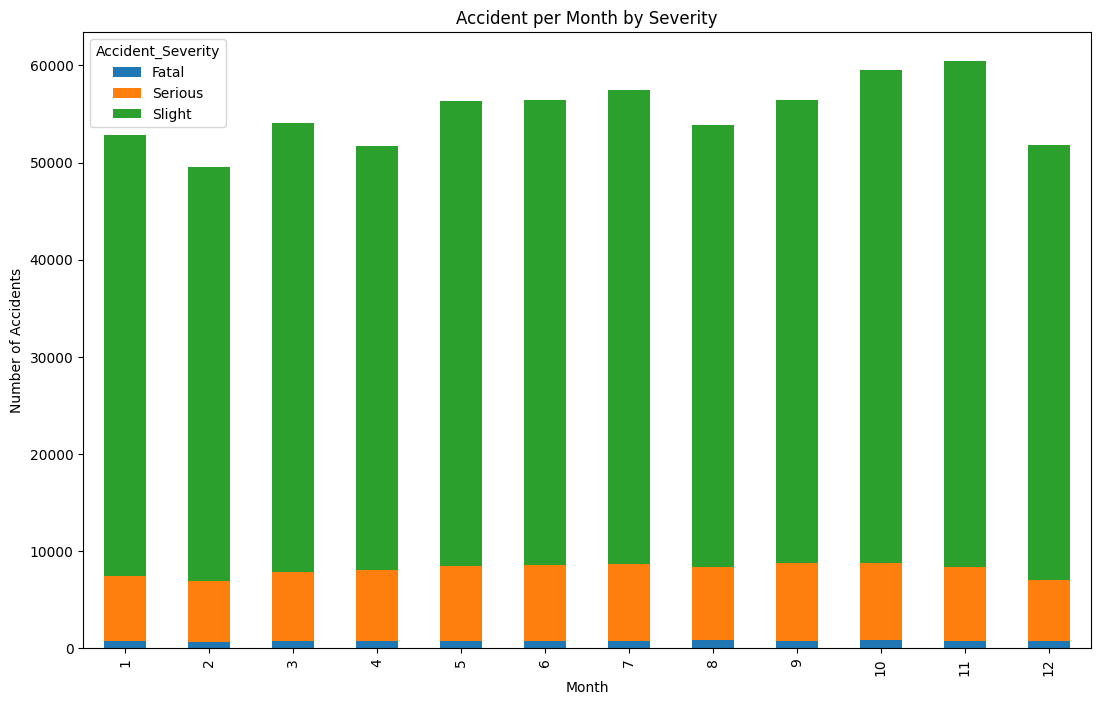

In [103]:
accident_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

accident_per_month_severity.plot(kind = 'bar', stacked=True)
plt.title('Accident per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()

<h1>Area Analysis</h1>

In [104]:
area_year = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365.0,552.0,171.0,305.0,107.0,397.0,282.0,268.0,367.0,401.0,...,356.0,710.0,215.0,291.0,333.0,366.0,502.0,328.0,230.0,503.0
2020,513.0,691.0,164.0,299.0,105.0,321.0,282.0,288.0,356.0,338.0,...,349.0,609.0,210.0,244.0,340.0,389.0,449.0,295.0,230.0,459.0
2021,445.0,687.0,155.0,298.0,20.0,335.0,232.0,280.0,338.0,340.0,...,303.0,633.0,239.0,255.0,318.0,323.0,397.0,321.0,273.0,484.0
2022,NaN,NaN,129.0,226.0,NaN,294.0,NaN,NaN,315.0,316.0,...,302.0,514.0,194.0,218.0,311.0,283.0,381.0,294.0,236.0,451.0


<h1>Creating Line plot</h1>

NameError: name 'count' is not defined

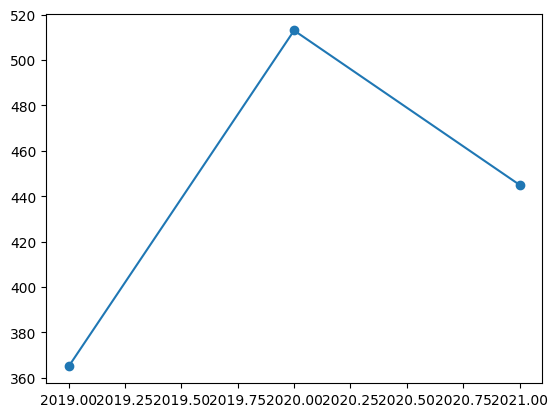

In [105]:
for x in pivot_table:
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker = 'o')
    if count == 10:
        break

plt.gcf().set_size_inches(13, 8)
plt.legend()
plt.show()

In [ ]:
plt.plot(pivot_table.index, pivot_table['Aberdeenshire'], label = 'Aberdeenshire', marker = 'o')
plt.plot(pivot_table.index, pivot_table['Adur'], label = 'Adur', marker = 'o')
plt.plot(pivot_table.index, pivot_table['Aberdeen City'], label = 'Aberdeen City', marker = 'o')
plt.plot(pivot_table.index, pivot_table['Allerdale'],label = 'Allerdale', marker = 'o')
plt.legend()
plt.show()

In [ ]:
accident.columns

<h1> Visualizing Correlation</h1>

In [ ]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(type_vh, cmap='crest')
plt.show()

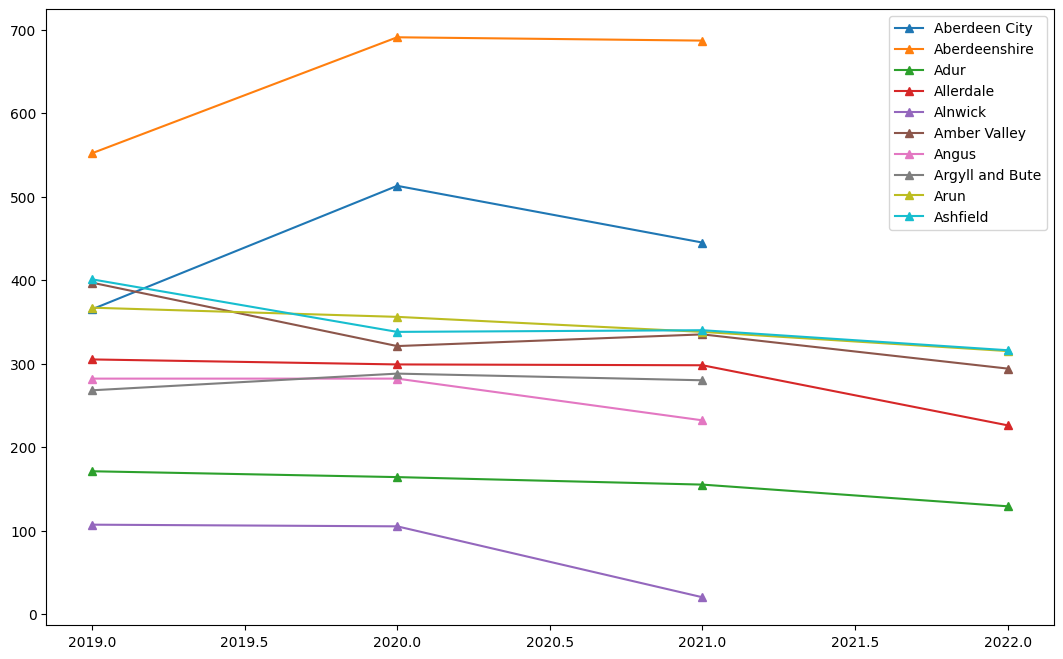

In [124]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker='^')
    if count == 10:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()
